# `DATA ANALYSIS`

## **TOPIC: FILMS ANALYSIS**

`Group ID`: 17

`Group Member`:
- 22127404_Tạ Minh Thư
- 22127359_Chu Thúy Quỳnh
- 22127302_Nguyễn Đăng Nhân

### Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read data from file

In [2]:
data = pd.read_csv('cleaned_data.csv', sep=",")
data

,Rank,Title,Foreign %,Domestic %,Year,Genre,Director,Writer,Cast
0,1,Avatar,73.1,26.9,2009,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",['James Cameron'],['James Cameron'],"['Sam Worthington', 'Zoe Saldana', 'Sigourney ..."
1,2,Avengers: Endgame,69.3,30.7,2019,"['Action', 'Adventure', 'Drama', 'Sci-Fi']","['Anthony Russo', 'Joe Russo']","['Christopher Markus', 'Stephen McFeely', 'Sta...","['Robert Downey Jr.', 'Chris Evans', 'Mark Ruf..."
2,3,Avatar: The Way of Water,70.5,29.5,2022,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",['James Cameron'],"['James Cameron', 'Rick Jaffa', 'Amanda Silver...","['Sam Worthington', 'Zoe Saldana', 'Sigourney ..."
3,4,Titanic,70.2,29.8,1997,"['Drama', 'Romance']",['James Cameron'],['James Cameron'],"['Leonardo DiCaprio', 'Kate Winslet', 'Billy Z..."
4,5,Star Wars: Episode VII - The Force Awakens,54.8,45.2,2015,"['Action', 'Adventure', 'Sci-Fi']",['J.J. Abrams'],"['Lawrence Kasdan', 'J.J. Abrams', 'Michael Ar...","['Daisy Ridley', 'John Boyega', 'Oscar Isaac',..."
...,...,...,...,...,...,...,...,...,...
995,996,The Final Destination,64.3,35.7,2009,"['Horror', 'Thriller']",['David R. Ellis'],"['Eric Bress', 'Jeffrey Reddick']","['Nick Zano', 'Krista Allen', 'Andrew Fiscella..."
996,997,Atlantis: The Lost Empire,54.8,45.2,2001,"['Action', 'Adventure', 'Animation', 'Family',...","['Gary Trousdale', 'Kirk Wise']","['Tab Murphy', 'Kirk Wise', 'Gary Trousdale', ...","['Michael J. Fox', 'Jim Varney', 'Corey Burton..."
997,998,Inside Man,52.4,47.6,2006,"['Crime', 'Drama', 'Mystery', 'Thriller']",['Spike Lee'],['Russell Gewirtz'],"['Denzel Washington', 'Clive Owen', 'Jodie Fos..."
998,999,The Waterboy,13.2,86.8,1998,"['Comedy', 'Sport']",['Frank Coraci'],"['Tim Herlihy', 'Adam Sandler']","['Adam Sandler', 'Kathy Bates', 'Henry Winkler..."


### Question 1: What are the highest-grossing genres over time?

**Purpose**: 
Identifying the most popular movie genres so that producers and film studios to focus on genres with higher revenue potential, allowing them to make strategic decisions regarding film development, production, and promotion. Understanding which genres attract the most viewers and have the potential to generate significant revenue will help filmmakers optimize their investment strategies and distribution plans.

**How do we answer this question**:
- If the genre column includes multiple genres for some movies, we need to split these into individual genres.

- Breaking the genres list into separate rows so that each genre of a movie gets its own row. This allows us to treat each genre independently for analysis.

- After the genres have been exploded into individual rows, we count how often each genre appears across all movies. This will give us a frequency distribution of genres and show which genres have the highest occurrence.

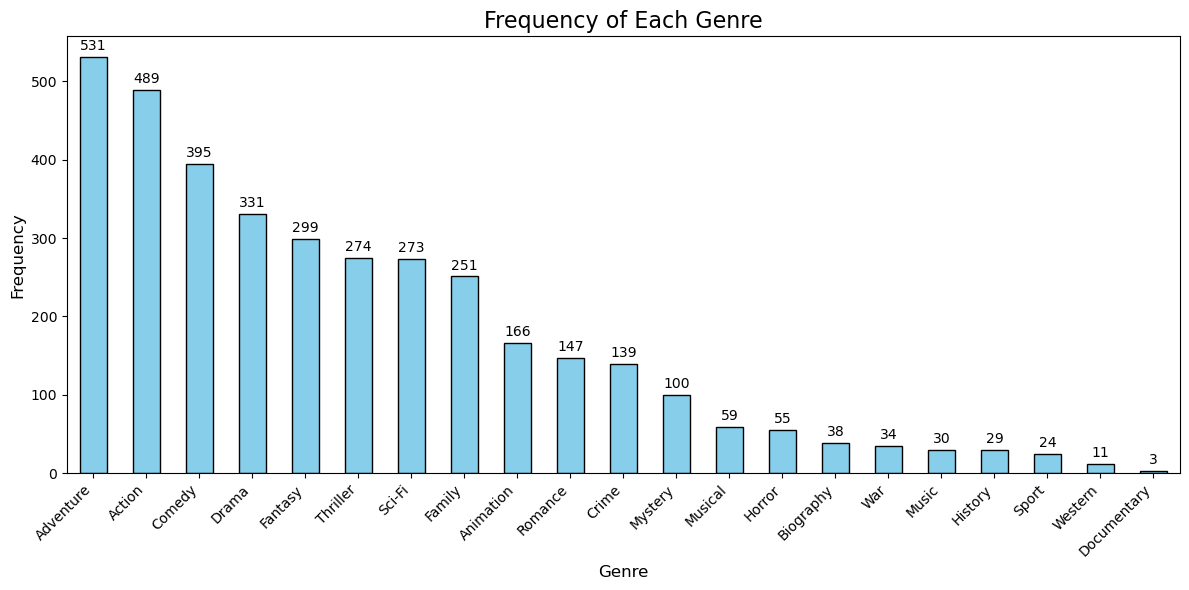

In [3]:
data['Genre'] = data['Genre'].apply(eval)
exploded_data = data.explode('Genre')

genre_counts = exploded_data['Genre'].value_counts()

plt.figure(figsize=(12, 6))
ax = genre_counts.plot(kind='bar', color='skyblue', edgecolor='black')

for i, count in enumerate(genre_counts):
    ax.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=10)

plt.title("Frequency of Each Genre", fontsize=16)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


- The Adventure and Action genres have the highest frequency of occurrences, with 531 and 489 occurrences, respectively. 
- The Comedy, Drama, Fantasy, and Thriller genres also have a significant presence, with 395, 331, 299, and 274 occurrences, respectively. 
- In contrast, genres like Western, Documentary, and War appear much less frequently, with 11, 3, and 34 occurrences, respectively.

#### Conclusion
- The highest-grossing genres over time are likely to be Adventure and Action. These genres have the highest frequency of occurrences, indicating that they are the most popular and likely to generate higher revenue. These films often have large production budgets, extensive marketing campaigns, and wide distribution, which contribute to their commercial success.

### Question 2: What role does the domestic gross percentage play in a movie’s rank?

- Purpose: determine whether domestic support (through local box-office sales) plays a significant role in a movie’s popularity, its commercial success, or if it’s the international market that drives its position in the rankings. This insight can help filmmakers and studios decide how much emphasis to place on domestic marketing, distribution strategies, and whether to focus more on the international market to boost their rankings.

**How do we answer this question**:
- Dividing the data into groups based on the ranges of "Domestic %": 0-20%, 20-40%, 40-60%, 60-80%, 80-100%. This grouping helps classify movies based on their level of reliance on domestic revenue. It makes it easier to compare groups of movies with similar characteristics.

- After grouping the data, calculating the average rank of movies within each group. The goal is to determine if there are any differences in rank between groups of movies with varying levels of domestic revenue. Calculating the average rank will help us identify trends, such as whether movies with higher domestic revenue tend to have higher ranks.

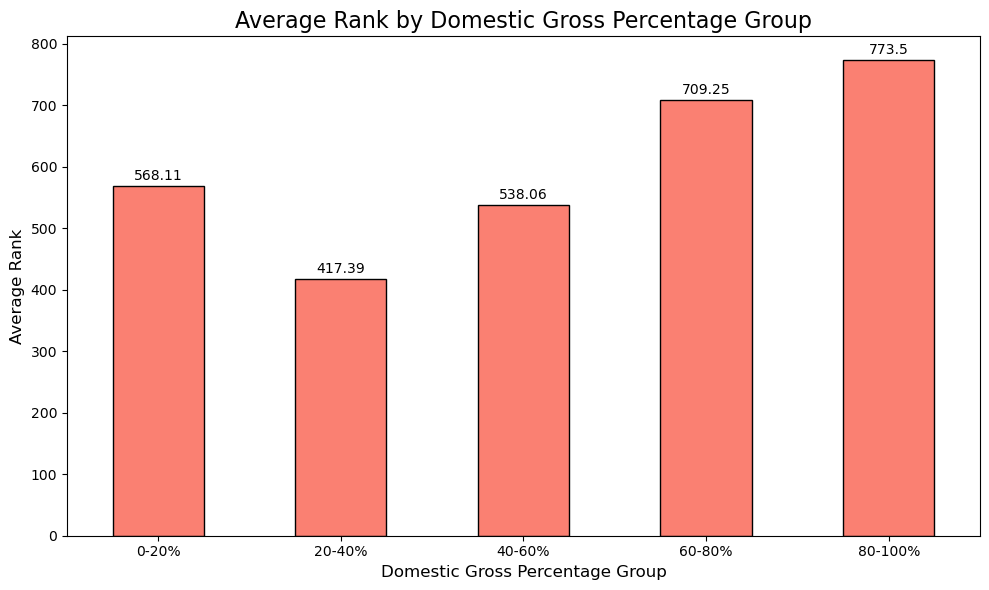

In [4]:
data['Domestic %'] = pd.to_numeric(data['Domestic %'], errors='coerce')

bins = [0, 20, 40, 60, 80, 100] 
labels = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']
data['Domestic Group'] = pd.cut(data['Domestic %'], bins=bins, labels=labels, include_lowest=True)

grouped_data = data.groupby('Domestic Group')['Rank'].mean()

plt.figure(figsize=(10, 6))
ax = grouped_data.plot(kind='bar', color='salmon', edgecolor='black')

for i, rank in enumerate(grouped_data):
    ax.text(i, rank + 5, str(round(rank, 2)), ha='center', va='bottom', fontsize=10)

plt.title('Average Rank by Domestic Gross Percentage Group', fontsize=16)
plt.xlabel('Domestic Gross Percentage Group', fontsize=12)
plt.ylabel('Average Rank', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- Groups 0-20% and 20-40%: Movies with a low domestic gross percentage (0-40%) tend to have better ranks (smaller rank values), especially in the 20-40% group.
- Group 40-60%: A slight increase in rank value indicates a drop in rank when the domestic gross percentage falls within this range.
- Groups 60-80% and 80-100%: A significant increase in rank (higher rank values) is observed, especially for the 80-100% group, suggesting that movies heavily reliant on domestic gross tend to have poorer ranks.

#### Conclusion

- From the data and the plot, it is evident that the domestic gross percentage significantly influences a movie's rank. Movies with a lower domestic gross percentage (especially in the 20-40% range) tend to rank better, while those relying heavily on domestic gross (80-100%) generally rank lower. This may indicate that movies with strong international appeal are often ranked higher.
- The international market plays a crucial role in boosting a movie’s ranking and overall success. Therefore, filmmakers should focus on designing global marketing campaigns and optimizing content to appeal to diverse cultures. This will help them expand their audience reach and increase their chances of achieving higher box-office revenue.

### Question 3: How does the release year affect a movie's likelihood of achieving high revenue?


**Purpose**: This analysis shows how the number of high-revenue movies has changed over the years, helping studios recognize trends in movie production and revenue generation. It highlights the growth of the global film industry, helping to assess the impact of technological advancements, increased production quality, and wider distribution networks over time.

**How do we answer this question**
- Convert `Year` to numeric for sorting purposes.
- Group the dataset by the release year.
- Count the number of movies that made it to the Top 1000 Lifetime Grosses.

In [5]:
data['Year_numeric'] = pd.to_numeric(data['Year'], errors='coerce')
movie_count_per_year = data.groupby('Year_numeric')['Rank'].count().reset_index()

- Use line chart to show how the number of movies in the Top 1000 Lifetime Grosses changes over the years.

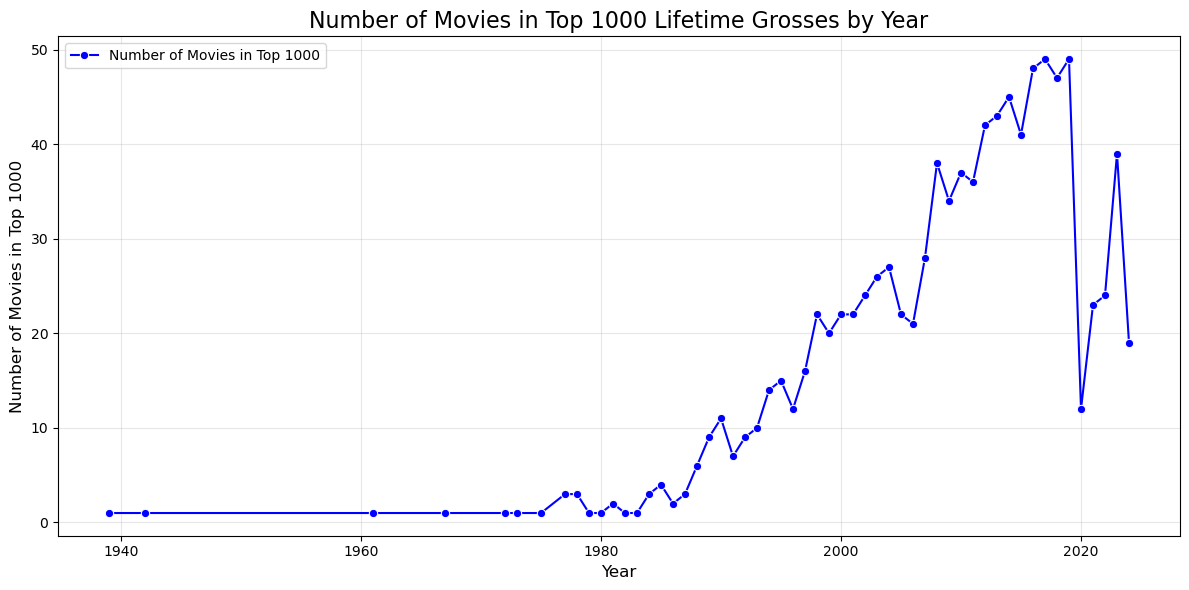

In [6]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=movie_count_per_year, x='Year_numeric', y='Rank', marker='o', color='b', label='Number of Movies in Top 1000')
plt.title('Number of Movies in Top 1000 Lifetime Grosses by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Movies in Top 1000', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

- Early years (1939–1970s) have very few movies represented in the top 1000.
- A gradual increase is observed in the 1980s and 1990s, likely due to the growth of the global film industry and wider distribution.
- Significant growth is evident from the 2000s onward, reflecting the explosion of blockbuster films and the globalization of cinema.
- There is a sharp drop for 2020, attributed to the pandemic disrupting film production and box office performance.

#### Conclusion

- Early years (1939–1970s) have fewer entries, likely because fewer movies were produced, and global box office tracking wasn’t as widespread.
- Starting in the 1980s, there is consistent growth, likely due to technological advancements (special effects, CGI), better global distribution networks, and rising international audiences.
- From the 2000s onward, the era of franchises and blockbusters (e.g., Marvel, Harry Potter) dominates the list.
- The sharp drop in 2020 reflects the global impact of COVID-19 on movie production and cinema closures.

-> This analysis underscores the interplay between historical, technological, and cultural factors that shape movie revenue trends. It highlights how the year of release significantly impacts a movie's revenue potential, as evidenced by the evolving trends in the Top 1000 list.

### Question 4: Which are the top 10 writer-genre pairs with the highest number of movies in the top-ranked movies?


**Purpose**: This analysis identifies writers who excel in specific genres, offering insights into their expertise or specialization. It enables movie studios to target writer-genre combinations for strategic collaborations, potentially enhancing the success of future projects.

**How do we answer this question**
- Converts stringified lists in the `Writer` column to actual Python lists.
- Exploding both `Writer` and `Genre` ensures each writer-genre combination is represented in its own row.
- Combines the writer and genre into a unique pair for grouping and counting.
- Sort by `Rank`.
- Groups by `Writer-Genre` and counts the occurrences of movies for each pair.
- Extracts the top 10 writer-genre pairs by movie count.

In [7]:
data['Writer'] = data['Writer'].apply(eval)
# Explode the 'Writer' column to handle multiple writers
data_expanded = data.explode('Writer').explode('Genre')  # Exploding both Writers and Genres

# Create writer-genre pairs
data_expanded['Writer-Genre'] = data_expanded['Writer'] + ' - ' + data_expanded['Genre']

# Sort by Rank to prioritize top-ranked movies
data_sorted = data_expanded.sort_values(by='Rank')

# Group by Writer-Genre and count the movies
grouped = data_sorted.groupby('Writer-Genre').agg({'Title': 'count'}).reset_index()
grouped = grouped.rename(columns={'Title': 'Movie Count'})

# Sort by Movie Count
top_writer_genres = grouped.sort_values(by='Movie Count', ascending=False).head(10)

# Display the top writer-genre pairs
print(top_writer_genres)


                  Writer-Genre  Movie Count
3334       Jack Kirby - Action           40
3340       Jack Kirby - Sci-Fi           38
7712         Stan Lee - Action           38
7718         Stan Lee - Sci-Fi           36
3335    Jack Kirby - Adventure           34
7713      Stan Lee - Adventure           33
8140  Terry Rossio - Adventure           23
8139     Terry Rossio - Action           20
2838  George Lucas - Adventure           20
8088   Ted Elliott - Adventure           20


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1800\3845030986.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_writer_genres, x='Movie Count', y='Writer-Genre', palette='viridis')


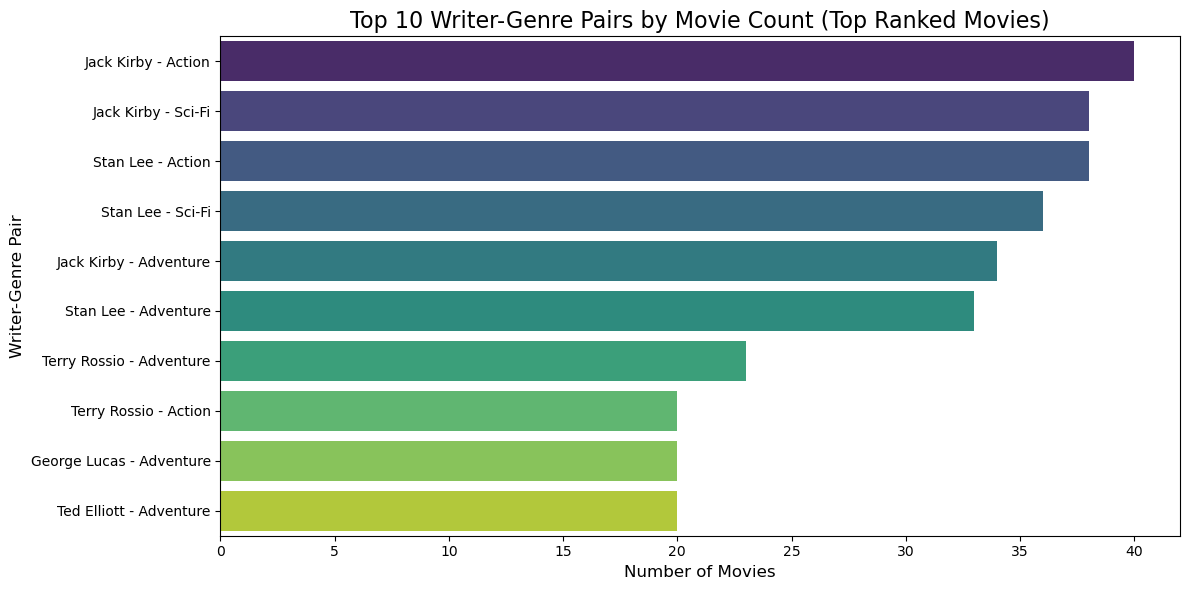

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_writer_genres, x='Movie Count', y='Writer-Genre', palette='viridis')
plt.title('Top 10 Writer-Genre Pairs by Movie Count (Top Ranked Movies)', fontsize=16)
plt.xlabel('Number of Movies', fontsize=12)
plt.ylabel('Writer-Genre Pair', fontsize=12)
plt.tight_layout()
plt.show()

- Jack Kirby and Stan Lee dominate the top positions with Action and Sci-Fi genres, indicating their immense influence in these categories.
- Writers like Jack Kirby, Stan Lee, Terry Rossio, George Lucas, and Ted Elliott frequently appear in the Adventure genre, showcasing its popularity among successful writers.
-  There is a noticeable gap in movie counts between the top writers (Jack Kirby, Stan Lee) and others, indicating their extraordinary contributions to specific genres.
- Writers like Terry Rossio and Ted Elliott contribute across multiple genres, reflecting versatility and adaptability.

#### Conclusion

The top 10 Writer-Genre pairs by movie count are:

1.  Jack Kirby - Action (40 movies)
2.  Jack Kirby - Sci-Fi (38 movies)
3.  Stan Lee - Action (38 movies)
4.  Stan Lee - Sci-Fi (36 movies)
5.  Jack Kirby - Adventure (34 movies)
6.  Stan Lee - Adventure (33 movies)
7.  Terry Rossio - Adventure (23 movies)
8.  Terry Rossio - Action (20 movies)
9.  George Lucas - Adventure (20 movies)
10. Ted Elliott - Adventure (20 movies)

-> These pairs highlight the key contributions of writers to specific genres, with Jack Kirby and Stan Lee leading the pack in Action, Sci-Fi, and Adventure genres.

-> Writer-genre pairs are not just critical to the creative aspect of filmmaking but also have a direct impact on revenue. Established pairs with a track record of success, particularly in globally appealing genres, are pivotal in driving box-office performance and ensuring commercial viability.

### Question 5: Which director - cast collaborations consistently result in movies with high gross revenue?


**Purpose**: To identify director-actor collaborations that consistently produce high-grossing movies, offering insights into patterns of success in the film industry. Additionally, it provides researchers and marketers with valuable data to understand trends, audience preferences, and the factors behind box office hits, ultimately guiding better decision-making in filmmaking and marketing strategies.

**How do we answer this question**
- Cleans and splits list-like strings into actual lists for "Director" and "Cast".
- Splits multi-actor entries into individual rows.
- Groups by director-cast pairs and counts their occurrences and sorts pairs by frequency and selects the top 20.

                     Director                  Cast  Count
2433            Peter Jackson          Ian McKellen      6
858              Dennis Dugan          Adam Sandler      6
1132           Gore Verbinski           Johnny Depp      5
2010          Martin Scorsese     Leonardo DiCaprio      5
3307               Tim Burton  Helena Bonham Carter      4
2775          Robert Zemeckis     Christopher Lloyd      4
235          Barry Sonnenfeld            Will Smith      4
3190         Steven Spielberg         Harrison Ford      4
818               David Yates          Rupert Grint      4
809               David Yates      Daniel Radcliffe      4
3364            Todd Phillips     Zach Galifianakis      4
2079              Michael Bay          Josh Duhamel      4
2900               Ron Howard             Tom Hanks      4
3310               Tim Burton           Johnny Depp      4
574     Christopher McQuarrie            Tom Cruise      4
175   Anthony Russo Joe Russo           Chris Evans     

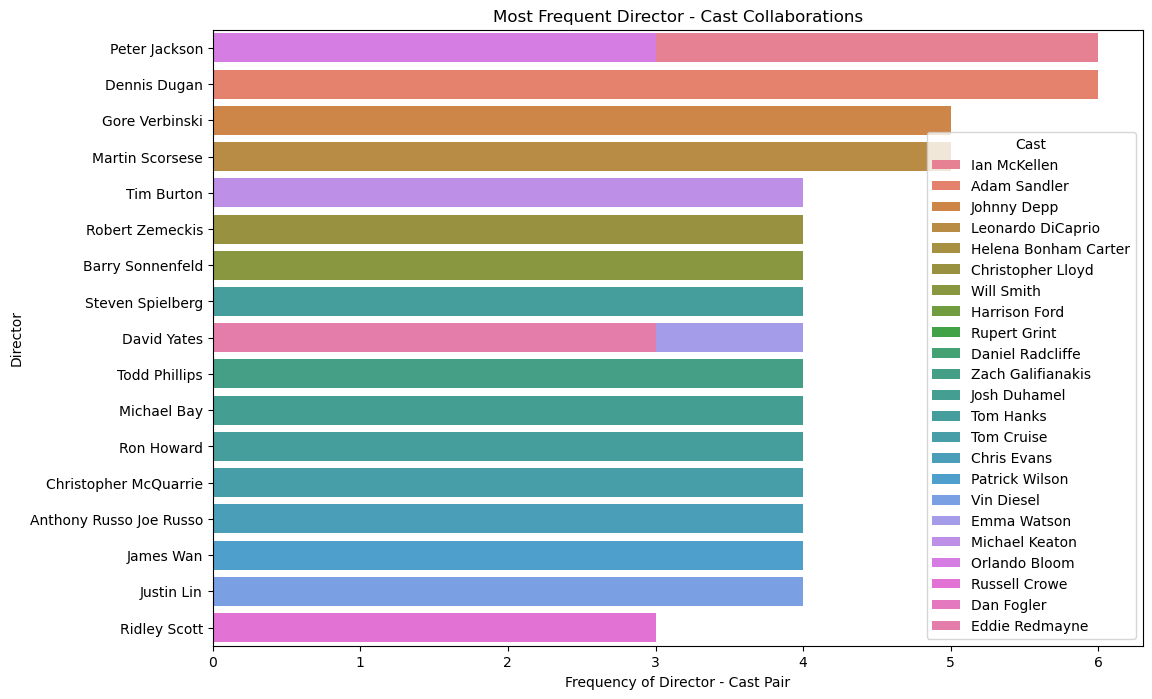

In [8]:
data["Director"] = data["Director"].str.strip("[]").str.replace("'", "").str.split(", ")
data["Cast"] = data["Cast"].str.strip("[]").str.replace("'", "").str.split(", ")

data = data.explode("Cast")

data["Director"] = data["Director"].apply(lambda x: " ".join(x).strip() if isinstance(x, list) else "")
data["Cast"] = data["Cast"].fillna("").astype(str).str.strip()

director_cast_count = data.groupby(["Director", "Cast"]).size().reset_index(name="Count")

most_frequent_pairs = director_cast_count.sort_values(by="Count", ascending=False)

most_frequent = most_frequent_pairs.head(25)

print(most_frequent)
plt.figure(figsize=(12, 8))

sns.barplot(data=most_frequent, x="Count", y="Director", hue="Cast", dodge=False)

plt.xlabel("Frequency of Director - Cast Pair")
plt.ylabel("Director")
plt.title("Most Frequent Director - Cast Collaborations")

plt.show()


- Peter Jackson with Ian McKellen, Denis Dugan with Adam Sandler have the most frequent collaborations , as shown by the longest bar. This suggests that Peter Jackson and Denis Dugan often works with the same actors across multiple films.
- Gore Verbinski also have strong collaborations, though with fewer repetitions than Peter Jackson and Denis Dugan.
- The chart also indicates the variety of genres these directors and actors might be involved in, suggesting that repeated collaborations may result from specific genre types or thematic preferences.

#### Conclusion

- The bar chart shows that director - cast collaborations play a significant role in the movie industry, with directors like Peter Jackson and Denis Dugan forming long-term partnerships with specific actors. This may contribute to a consistent style or success in their films. 
- Frequent partnerships between specific directors and cast are often linked to higher gross revenues. Successful director - cast teams can create a loyal audience base, leading to consistently successful films at the box office.